<a href="https://colab.research.google.com/github/FloydNichols97/MSIdentification/blob/main/Lipid_ID_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LOAD NECESSARY LIBRARIES

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy import mean
from numpy import std
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

IMPORT DATA SET FROM GITHUB

In [ ]:
url = 'https://raw.githubusercontent.com/FloydNichols97/MSIdentification/main/FAMEs_Mass_Training_Set.csv'
MS_data = pd.read_csv(url)
MS_data.head()

,Compound,RT,60,61,62,63,64,65,66,67,...,591,592,593,594,595,596,597,598,599,600
0,n-C16:0,12.55,166456,111264,9904,20101,9461,268601,141836,2439650,...,92,0,5,0,0,0,68,0,0,0
1,n-C16:0,12.55,443593,350092,29569,69209,30465,805658,448404,7238119,...,0,66,29,1,3,117,15,121,143,0
2,n-C16:0,12.55,424158,328017,28338,58854,28103,776950,389777,6713554,...,0,50,0,0,154,0,44,0,38,0
3,n-C16:0,12.55,348204,253124,21017,52707,20554,597177,333413,5324926,...,47,0,54,3,61,12,7,83,0,0
4,n-C16:0,12.56,429824,330468,22952,59045,34661,745882,399085,6639407,...,94,1,76,0,181,14,0,125,4,164


Partition data frame into testing set and training set

In [ ]:
X = MS_data.drop(columns=['Compound'])
y = MS_data['Compound']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

CREATE MODELS 

In [ ]:
# Random Forest Classifier
RF_model = RandomForestClassifier(n_estimators=541, bootstrap=True)
RF_model.fit(X_train, y_train)
RF_predictions = RF_model.predict(X_test)
RF_cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
RF_scores = cross_val_score(RF_model, X, y, scoring='accuracy', cv=RF_cv, n_jobs=-1, error_score='raise')
print('Accuracy: %.3f (%.3f)' % ((mean(RF_scores), std(RF_scores))))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  UserWarning,


Accuracy: 0.896 (0.078)


CREATE CONFUSION MATRIX

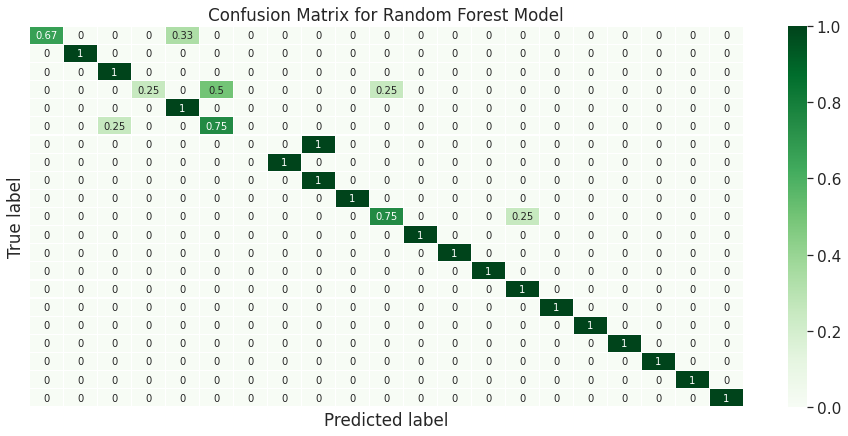

In [ ]:
RF_confusion = confusion_matrix(y_test, RF_predictions)

# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, RF_predictions)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = []
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

CLASSIFICATION REPORT

In [ ]:
print(classification_report(y_test, RF_predictions))

              precision    recall  f1-score   support

       C18:1       1.00      0.67      0.80         3
       C19:1       1.00      1.00      1.00         1
       PAIBE       0.67      1.00      0.80         2
     a-C15:0       1.00      0.25      0.40         4
    cy-C17:0       0.50      1.00      0.67         1
     i-C15:0       0.60      0.75      0.67         4
     i-C16:0       0.00      0.00      0.00         1
     n-C12:0       1.00      1.00      1.00         1
     n-C13:0       0.50      1.00      0.67         1
     n-C14:0       1.00      1.00      1.00         4
     n-C15:0       0.75      0.75      0.75         4
     n-C16:0       1.00      1.00      1.00         4
     n-C17:0       1.00      1.00      1.00         2
     n-C18:0       1.00      1.00      1.00         1
     n-C19:0       0.50      1.00      0.67         1
     n-C20:0       1.00      1.00      1.00         3
     n-C22:0       1.00      1.00      1.00         5
     n-C24:0       1.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Support Vector Machine
SVM_model = svm.SVC(kernel='rbf', C=1, gamma='scale')
SVM_model.fit(X_train, y_train)
SVM_predictions = RF_model.predict(X_test)
SVM_cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
SVM_scores = cross_val_score(SVM_model, X, y, scoring='accuracy', cv=SVM_cv, n_jobs=-1, error_score='raise')
print('Accuracy: %.3f (%.3f)' % ((mean(SVM_scores), std(SVM_scores))))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  UserWarning,


Accuracy: 0.110 (0.060)


In [ ]:
# k Nearest-Neighbor
kNN_model = KNeighborsClassifier(n_neighbors=1, weights='distance')
kNN_model.fit(X_train, y_train)
kNN_predictions = kNN_model.predict(X_test)
kNN_cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
kNN_scores = cross_val_score(kNN_model, X, y, scoring='accuracy', cv=kNN_cv, n_jobs=-1, error_score='raise')
print('Accuracy: %.3f (%.3f)' % ((mean(kNN_scores), std(kNN_scores))))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  UserWarning,


Accuracy: 0.627 (0.115)


In [ ]:
# Ensemble Model
estimators = [('RF', RF_model), ('kNN', kNN_model), ('SVM', SVM_model)]
ensemble = VotingClassifier(estimators, voting='hard')
ensemble.fit(X_train, y_train)
ensemble_cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
ensemble_scores = cross_val_score(ensemble, X, y, scoring='accuracy', cv=ensemble_cv, n_jobs=-1, error_score='raise')
print('Accuracy: %.3f (%.3f)' % ((mean(ensemble_scores), std(ensemble_scores))))
ensemble.score(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  UserWarning,


Accuracy: 0.677 (0.101)


0.6538461538461539

In [ ]:
# Real Data Predictions
url2 = 'https://raw.githubusercontent.com/FloydNichols97/MSIdentification/main/Unknown_FAMEs.csv'
Sample = pd.read_csv(url2)
Sample = Sample.drop(columns=['Compound'])
predict = RF_model.predict(Sample) # Computes predicted lipid componds 
print(predict) # Prints predicted compounds based on the Random Forest Classifier 

['n-C16:0' 'C18:1' 'n-C16:0' 'n-C18:0']


In [ ]:
url3 = 'https://raw.githubusercontent.com/FloydNichols97/MSIdentification/main/fame_training_set_cleaned_wide.csv'
Sample2 = pd.read_csv(url3)
Sample2 = Sample2.drop(columns=['compound'])
predict2 = RF_model.predict(Sample2) # Computes predicted lipid compounds 
print(predict2) # Prints predicted compounds based on the Random Forest Classifier 

['n-C17:0 ' 'i-C16:0 ' 'i-C16:0 ' 'C16:1' 'i-C16:0 ' 'n-C13:0' 'i-C16:0 '
 'C16:1' 'C18:1' 'n-C17:0 ' 'n-C17:0 ' 'C16:1' 'i-C16:0 ' 'n-C19:0 '
 'C16:1' 'PAIBE']
